In [1]:
import io

import pandas as pd
import requests

In [9]:

df=pd.read_excel('.\default of credit card clients.xls', header=1, index_col=0)



In [10]:
df.rename(columns={'default payment next month': 'target'})

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [6]:
#first we are gonna import some classifiers and also the train_test split To randomly split the data into train/test 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [24]:
df.head#here we can see a dataframe of all the information ans in the default payment which is the target we can see the 0s and 1s from we can see if the customer is gonna pay or not

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1 

In [21]:
df['default payment next month'].value_counts()#it doesnt work with rename we did as target.here we see exactly how many will default to pay or not

0    23364
1     6636
Name: default payment next month, dtype: int64

In [25]:
df=df.sample(frac=1,random_state=1)#so by doing this we see that our data is shuffled and ready to train
df=df.reset_index(drop=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
1,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
2,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
3,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
4,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [34]:
bank_data=df.to_numpy()#we put our data in an array
index=int(len(bank_data)*0.8)#we use an 80% percentage sample
X_train,y_train=bank_data[:index,:-1],bank_data[:index,-1]# All of the columns, apart from the last one, are input features  the last column is the target feature
X_test,y_test=bank_data[index:,:-1],bank_data[index:,-1]
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)#we see that 240000 fell into train for inputs we 23 columns and for outputs 24000 same thing for test but with smaller samples

(((24000, 23), (24000,)), ((6000, 23), (6000,)))

In [35]:
model=LogisticRegression().fit(X_train,y_train)
test_predictions=model.predict(X_test)
pd.value_counts(test_predictions)#this way we can see how many sample are default to pay or not

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    5998
1       2
dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

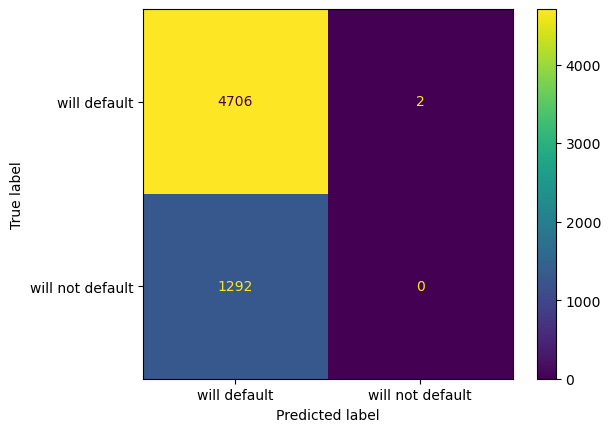

In [40]:
cm=confusion_matrix(y_test,test_predictions,labels=[0,1])
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['will default','will not default'])
disp.plot()

In [ ]:
#so we see there 1294 examples were we were wrong

In [42]:
#now we'll see our accurasy
tn,fp,fn,tp=cm.ravel()#this is how we get true negatives true positives false positives and false negatives
def accurasy(tn,fp,fn,tp):
    return(tp+tn)/(tp+tn+fp+fn)#this is the mathematical equation for accuracy
"Accuracy:{0}".format(accurasy(tn,fp,fn,tp))

'Accuracy:0.7843333333333333'

In [43]:
#now we'll see our precision
def p(tn,fp,fn,tp):
    return tp/(tp+fp)
"presicion:{0}".format(p(tn,fp,fn,tp))


'presicion:0.0'

In [46]:
#because we have a zero in our display matrix
#and lastly a classification report who shows the presicion,recall,... and support is just the amount of examples that we had
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predictions,labels=[0,1],target_names=['default','not default']))

              precision    recall  f1-score   support

     default       0.78      1.00      0.88      4708
 not default       0.00      0.00      0.00      1292

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.78      0.69      6000

